In [3]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

##### Exercise 7.1

Why do you think a larger random walk task (19 states instead of 5) was used in the examples of this chapter? Would a smaller walk have shifted the advantage to a different value of n? How about the change in left-side outcome from 0 to -1? Would that have made any difference in the best value of n?

A small random walk would truncate large n-step to their total returns since episodes will be shorter (i.e. large n would just result in alpha MC methods). Therefore we should expect the advantage at lower n for smaller random walks. 

With values initialized at 0, if the left-most value terminated in 0 reward, we would need longer episodes for an agent to assign the correct values to the states left of center, since episodes that terminate to the left will not cause any updates initially, only the episodes that terminate to the right end with non-zero reward. Thus I would expect the best value of n to increase.

---------

##### Exercise 7.2

Why do you think on-line methods worked better than off-line methods on the example task?

Off-line methods generally take random actions with some small probability $\epsilon$. We would expect at least 1-2 random actions in an environment with a minimum of 10 states to termination, depending on $\epsilon$ (assuming $\epsilon$ is between 10-20%). Therefore, even after finding the optimal action-values, these random actions will attribute erroneous rewards to certain actions, leading to higher RMSEs compared to on-line methods; we also see that larger n is more optimal for off-line methods compared to on-line, presumably because larger n reduces noise from the $\epsilon$ greedy actions.

-----------

##### Exercise 7.3

In the lower part of Figure  7.2, notice that the plot for n=3 is different from the others, dropping to low performance at a much lower value of $\alpha$ than similar methods. In fact, the same was observed for n=5, n=7, and n=9. Can you explain why this might have been so? In fact, we are not sure ourselves.

My hypothesis is that odd values of n have higher RMSE because of the environment. It takes at a minimum, an odd number of steps to reach termination from the starting state. For off-line methods, even after finding the optimal action-values, an agent may still not terminate in an odd number of steps. Therefore my hypothesis is that odd n-step methods are more likely to cause erroneous updates to the $\epsilon$ greedy actions compared to even n-step methods. A quick way to test this, would be to create a random-walk where an agent will terminate at a minimum in an even number of steps, and then to observe the same plots as in Figure 7.2. 

----------

#### Exercise 7.4  

The parameter $\lambda $ characterizes how fast the exponential weighting in Figure  7.4 falls off, and thus how far into the future the $\lambda $-return algorithm looks in determining its backup. But a rate factor such as $\lambda $ is sometimes an awkward way of characterizing the speed of the decay. For some purposes it is better to specify a time constant, or half-life. What is the equation relating $\lambda $ and the half-life, $\tau$, the time by which the weighting sequence will have fallen to half of its initial value?

The half life occurs when weighting drops in half:

$ \lambda^{n} = 0.5 $,

which occurs at,
$n = -ln(2) / ln(\lambda) = \tau$


-----
Getting (7.3) from the equation above it:

$R_t^\lambda = (1 - \lambda) \sum_{n=1}^\infty \lambda^{n-1} R^{(n)}_t$,

after $T-t-1$, we sum to infinity but with $R^{T-t-1}_t$, which is just the total return $R_t$, so:

$R_t^\lambda = (1 - \lambda) \sum_{n=1}^{T-t-1} \lambda^{n-1} R^{(n)}_t + (1 - \lambda) R_t \sum_{n=T-t-1}^{\infty} \lambda^{n} $

We can remove $\lambda^{T-t-1}$ from the last sum to get $ (1 - \lambda) R_t \lambda^{T-t-1} \sum_{n=0}^\infty \lambda^n = (1 - \lambda) R_t \lambda^{T-t-1} \frac{1}{1 - \lambda}$, so that: 

$R_t^\lambda = (1 - \lambda) \sum_{n=1}^{T-t-1} \lambda^{n} R^{(n)}_t + \lambda^{T-t-1} R_t  $

----------

##### Exercise 7.5

In order to get TD($\lambda$) to be equivalent to the $\lambda$-return algorithm in the online case, the proposal is that $\delta_t = r_{t+1} + \gamma V_t(s_{t+1}) - V_{t-1}(s_t) $ and the n-step return is $R_t^{(n)} = r_{t+1} + \dots + \gamma^{n-1} r_{t+n} + \gamma^n V_{t+n-1}(s_{t+n}) $. To show that this new TD method is equivalent to the $\lambda$ return, it suffices to show that $\Delta V_t(s_t)$ for the $\lambda$ return is equivalent to the new TD with modified $\delta_t$ and $R_t^{(n)}$.

As such, we expand the $\lambda$ return:

$
\begin{equation}
\begin{split}
\frac{1}{\alpha} \Delta V_t(s_t) =&  -V_{t-1}(s_t) + R_t^\lambda\\
=& -V_{t-1}(s_t) + (1 - \lambda) \lambda^0 [r_{t+1} + \gamma V_t(s_{t+1})] + (1-\lambda) \lambda^1 [r_{t+1} + \gamma r_{t+2} + \gamma^2 V_{t+1}(s_{t+2})] + \dots\\
=& -V_{t-1}(s_t) + (\gamma \lambda)^0 [r_{t+1} + \gamma V_t(s_{t+1}) - \gamma \lambda V_t(s_{t+1})] + (\gamma \lambda)^1 [r_{t+2} + \gamma V_{t+1}(s_{t+2}) - \gamma \lambda V_{t+1}(s_{t+2})] + \dots\\
=& (\gamma \lambda)^0 [r_{t+1} + \gamma V_t(s_{t+1}) - V_{t-1}(s_t)] + (\gamma \lambda) [r_{t+2} + \gamma V_{t+1}(s_{t+2}) - V_t(s_t+1)] + \dots\\
=& \sum_{k=t}^\infty (\gamma \lambda)^{k-t} \delta_k
\end{split}
\end{equation}
$

where $\delta_k = r_k + \gamma V_k(s_{k+1}) - V_{k-1}(s_k)$ as defined in the problem. Therefore, for online TD as defined above, the $\lambda$ return is exactly equivalent.


-------------

##### Exercise 7.6

In Example 7.5, suppose from state s the wrong action is taken twice before the right action is taken. If accumulating traces are used, then how big must the trace parameter $\lambda $ be in order for the wrong action to end up with a larger eligibility trace than the right action?
  
The eligibility trace update is $e_t(s) \leftarrow 1 + \gamma \lambda e_{t-1}(s)$ if $s = s_t$ and $e_t(s) \leftarrow \gamma \lambda e_{t-1}(s)$ if $s \neq s_t$. For two wrong actions, then one right action, $e_t(wrong) = (1 + \gamma \lambda) \gamma \lambda $, and $e_t(right) = 1$. If we want $e_t(wrong) \gt e_t(right)$, we need $(1 + \gamma \lambda) \gamma \lambda \gt 1$, or $\gamma \lambda \gt \frac{1}{2} (\sqrt(5) - 1)$.

-----------

##### Exercise 7.7


In [4]:
class LoopyEnvironment(object):
    def __init__(self):
        self._terminal_state = 5
        self._state = 0
        self._num_actions = 2
    
    @property
    def state(self):
        return self._state
    
    @state.setter
    def state(self, state):
        assert isinstance(state, int)
        assert state >= 0 and state <= self._terminal_state
        self._state = state
    
    @property
    def terminal_state(self):
        return self._terminal_state

    def reinit_state(self):
        self._state = 0
    
    def get_states_list(self):
        return range(self._terminal_state + 1)
    
    def get_actions_list(self):
        return range(self._num_actions)
    
    def is_terminal_state(self):
        return self._state == self._terminal_state
    
    def take_action(self, action):
        """
            action int: 0 or 1
                if action is 0 = wrong, then don't change the state
                if action is 1 = right, then go to the next state

            returns int: reward
        """
        assert action in [0, 1]
        assert self.is_terminal_state() == False
        if action == 1:
            self._state += 1
        if self._state == self._terminal_state:
            return 1
        return 0

In [150]:
import random
from itertools import product

class SARSA_lambda(object):
    def __init__(self, environment):
        states = environment.get_states_list()
        actions = environment.get_actions_list()
        
        self.environment = environment
        self.state_actions = list(product(states, actions))
        self.Q = np.random.random([len(states), len(actions)])
        self.e = np.zeros([len(states), len(actions)])
    
    def _get_epsilon_greedy_action(self, epsilon, p):
        if random.random() <= epsilon:
            action = random.randint(0, len(p) - 1)
            return action
        actions = np.where(p == np.amax(p))[0]
        action = np.random.choice(actions)
        return action
    
    def learn(self, num_episodes=100, Lambda=.9, gamma=.9, epsilon=.05, alpha=0.05,
             replace_trace=False):
        """
        Args:
            num_episodes (int): Number of episodes to train
            Lambda (float): TD(lambda) parameter 
                (if lambda = 1 we have MC or if lambda = 0 we have 1-step TD)
            gamma (float): decay parameter for Bellman equation
            epsilon (float): epsilon greedy decisions
            alpha (float): determines how big should TD update be
        
        Returns:
            list (int): the number of time steps it takes for each episode to terminate
        """
        
        time_steps = []
        for n in xrange(num_episodes):
            time_idx = 0
            self.e = self.e * 0
            self.environment.reinit_state()
            s = self.environment.state
            a = random.randint(0, self.Q.shape[1] - 1)
            while not self.environment.is_terminal_state():
                r = self.environment.take_action(a)
                time_idx += 1

                s_prime = self.environment.state
                a_prime = self._get_epsilon_greedy_action(epsilon, self.Q[s_prime, :])
                delta = r + gamma * self.Q[s_prime, a_prime] - self.Q[s, a]

                if replace_trace:
                    self.e[s, a] = 1
                else:
                    self.e[s, a] = self.e[s, a] + 1
                    
                for s, a in self.state_actions:
                    self.Q[s, a] = self.Q[s, a] + alpha * delta * self.e[s, a]
                    self.e[s, a] = gamma * Lambda * self.e[s, a]
                    
                s = s_prime
                a = a_prime
                
            time_steps.append(time_idx)
        return time_steps


In [151]:
env = LoopyEnvironment()
s = SARSA_lambda(env)

Run both the replace-trace and the SARSA($\lambda$) regular trace methods for X episodes, and repeat N times. Get the average time length over all X episodes for each iteration for each alpha. In the environment in Figure 7.18, it takes at a minimum, 5 time steps to terminate. This is our baseline.

In [154]:

def get_results(replace_trace, num_trials, num_episodes):
    alphas = np.linspace(.2, 1, num=10)
    results = np.array([])
    for alpha in alphas:
        res = []
        for i in xrange(num_trials):
            sarsa_lambda = SARSA_lambda(env)
            t = sarsa_lambda.learn(num_episodes=num_episodes, alpha=alpha, 
                                   replace_trace=replace_trace, gamma=0.9,
                                   epsilon=0.05, Lambda=0.9)
            res.append(np.mean(t))

        if results.shape[0] == 0:
            results = np.array([alpha, np.mean(res)])
        else:
            results = np.vstack([results, [alpha, np.mean(res)]])
    return results

num_trials = 100
num_episodes = 20
replace_trace = get_results(True, num_trials, num_episodes)
regular_trace = get_results(False, num_trials, num_episodes)
        

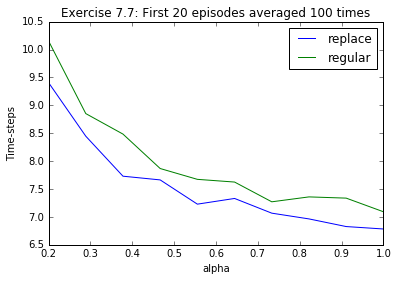

In [155]:
plt.plot(replace_trace[:, 0], replace_trace[:, 1], label='replace')
plt.plot(regular_trace[:, 0], regular_trace[:, 1], label='regular')

plt.legend()
plt.title('Exercise 7.7: First %d episodes averaged %d times' %(num_episodes, num_trials))
plt.xlabel('alpha')
plt.ylabel('Time-steps')

We see that on average, the replace trace method for $\gamma = 0.9$, $\lambda=0.9$, $\epsilon=0.05$ takes less time to terminate. With lower $\gamma$, the advantage of replace-trace seems to disappear.

-----------

##### Exercise 7.8

sarsa($\lambda$) with replacing traces, has a backup which is equivalent to sarsa($\lambda$) until the first repeated state-action pair. If we use the replace-trace formula in Figure 7.17, the replace-trace backup diagram terminates at the first repeated state-action pair. For the replace-trace formula in Figure 7.16, the backup diagram after the first repeated-state action pair is some hybrid of sarsa($\lambda$) with weights changed only for the repeated state-actions. I'm not sure how to draw that.

-------

##### Exercise 7.9

Write pseudocode for an implementation of TD($\lambda $) that updates only value estimates for states whose traces are greater than some small positive constant.
  

You can use a hash-map of traces to update, and if the update reduces the value of the trace below some constant, remove the trace from the hash-map. Traces get added to the hash-map as they get visited. If you want to write the pseudo code or real code, feel free to make a pull-request!

-------

##### Exercise 7.10

Prove that the forward and backward views of off-line TD($\lambda $) remain equivalent under their new definitions with variable $\lambda $ given in this section. Follow the example of the proof in Section 7.4.


As given in the book, the backward view is:

$
    e_t(s)=\left\{
                \begin{array}{ll}
                  \gamma \lambda_t e_{t-1}(s), & \mbox{ if } s \neq s_t\\
                  \gamma \lambda_t e_{t-1}(s) + 1, & \mbox{ if } s = s_t
                \end{array}
              \right.
$

and the forward view is:

$R_t^\lambda = \sum_{k=t+1}^{T-1} R_t^{(k-t)} (1 - \lambda_k) \prod_{i=t+1}^{k-1} \lambda_i + R_t \prod_{i=t+1}^{T-1} \lambda_i$.

The proof is almost identical to 7.4. For the backward view we need to express the eligibility trace nonrecursively:

$e_t(s) = \gamma \lambda_t e_{t-1}(s) + I_{ss_t} = \gamma \lambda_t [\gamma \lambda_{t-1} e_{t-2}(s) + I_{ss_{t-1}}] + I_{ss_t} = \sum_{k=0}^t I_{ss_k}\gamma^{t-k} \prod_{i=k+1}^t \lambda_i$

so that the sum of all updates to a given state is:

$\sum_{t=0}^{T-1}\alpha I_{ss_t} \sum_{k=t}^{T-1} \gamma^{k-t} \prod_{i=t+1}^k \lambda_i \delta_k$

which was obtained by following the same algebra as in 7.9 to 7.12.


The next step is to show that the sum of all updates of the forward view is equivalent to the previous equation above. We start with:


$
\begin{equation}
\begin{split}
\frac{1}{\alpha} \Delta V_t(s_t) =&  -V_{t}(s_t) + R_t^\lambda\\
=& -V_t(s_t) + (1 - \lambda_{t+1}) [r_{t+1} + \gamma V_t(s_{t+1})] + (1 - \lambda_{t+2})\lambda_{t+1} [r_{t+1} + \gamma r_{t+2} + \gamma^2 V_t(s_{t+2})] + \dots\\
=& -V_{t}(s_t) + [r_{t+1} + \gamma V_t(s_{t+1}) - \lambda_{t+1} \gamma V_t(s_{t+1})] + \gamma \lambda_{t+1} [r_{t+2} + \gamma V_t(s_{t+2}) - \gamma \lambda_{t+2} V_t(s_{t+2})] + \dots\\
=& [r_{t+1} + \gamma V_t(s_{t+1}) - V_t(s_t)] + (\gamma \lambda_{t+1})[r_{t+2} + \gamma V_t(s_{t+2}) - V_t(s_{t+1})] +  (\gamma^2 \lambda_{t+1}\lambda_{t+2}) \delta_{t+3} + \dots\\
\approx& \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k \prod_{i=t+1}^{k} \lambda_i
\end{split}
\end{equation}
$

which is equivalent to the backward case, and becomes an equality for offline updates.


------

** "Eligibility traces are the first line of defense against both long-delayed rewards and non-Markov tasks."**

"In the future it may be possible to vary the trade-off between TD and Monte Carlo methods more finely by using variable $\lambda $, but at present it is not clear how this can be done reliably and usefully."